<a href="https://colab.research.google.com/github/avaramahmood/Robovitics-AniML-Blog/blob/main/Decision_Trees_Ash_Ketchum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Decision Trees

## Fetching Dataset csv file from Github

In [1]:
!wget https://raw.githubusercontent.com/avaramahmood/Robovitics-AniML-Blog/refs/heads/main/Datasets/decision_tree_ash_tactics.csv

--2025-07-14 16:37:32--  https://raw.githubusercontent.com/avaramahmood/Robovitics-AniML-Blog/refs/heads/main/Datasets/decision_tree_ash_tactics.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9007 (8.8K) [text/plain]
Saving to: ‘decision_tree_ash_tactics.csv’

decision_tree_ash_t 100%[===================>]   8.80K  --.-KB/s    in 0s      

2025-07-14 16:37:32 (70.4 MB/s) - ‘decision_tree_ash_tactics.csv’ saved [9007/9007]



## Importing Dataset

In [2]:
import pandas as pd
df = pd.read_csv('decision_tree_ash_tactics.csv')
X = df.drop(columns='tactic')
y = df['tactic']

## Train-Test Split

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Training Model and Visualizing Results

Accuracy: 87.00%

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.87      0.76        15
           1       0.89      0.82      0.85        39
           2       0.93      0.91      0.92        46

    accuracy                           0.87       100
   macro avg       0.84      0.87      0.85       100
weighted avg       0.88      0.87      0.87       100



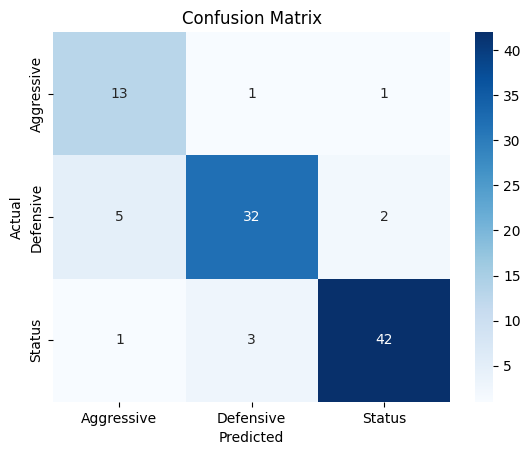

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Decision Tree
model = DecisionTreeClassifier(max_depth=5, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2%}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Aggressive', 'Defensive', 'Status'],
            yticklabels=['Aggressive', 'Defensive', 'Status'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Visualization of the Decision Tree Model

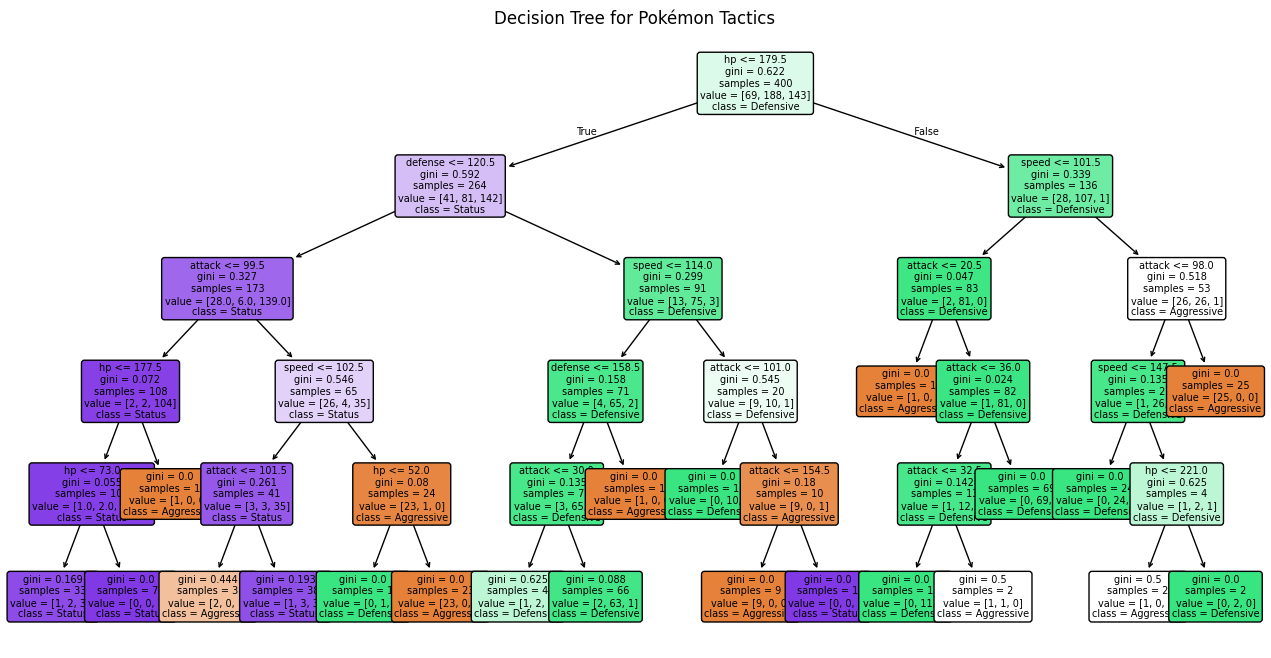

In [10]:
plt.figure(figsize=(16,8))
plot_tree(model, feature_names=X.columns, class_names=['Aggressive', 'Defensive', 'Status'],
          filled=True, rounded=True, fontsize=7)
plt.title("Decision Tree for Pokémon Tactics")
plt.show()